In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df= pd.read_csv("C:/Users/805321/Documents/loan_data_set.csv")

In [3]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,609,LP002933,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
500,610,LP002934,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Rural,Y
501,611,LP002935,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
502,612,LP002936,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

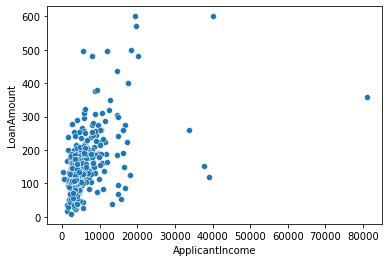

In [4]:
sns.scatterplot(x='ApplicantIncome' ,y='LoanAmount',data=df, palette='cool' )

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

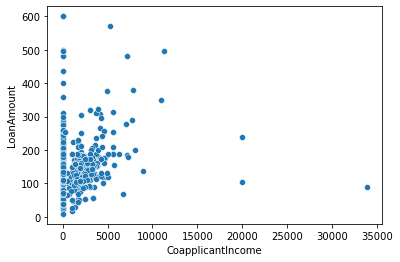

In [5]:
sns.scatterplot(x='CoapplicantIncome' ,y='LoanAmount',data=df, palette='cool' )

In [6]:
df.corr()[['LoanAmount']]

,LoanAmount
Unnamed: 0,0.059668
Dependents,0.167924
ApplicantIncome,0.499136
CoapplicantIncome,0.177144
LoanAmount,1.000000
Loan_Amount_Term,0.057743
Credit_History,-0.031489


In [7]:
features= df[['ApplicantIncome', 'CoapplicantIncome']]
features.sample(2)

,ApplicantIncome,CoapplicantIncome
63,3167,4000.0
229,9508,0.0


In [8]:
target= df[['LoanAmount']] #target
target.sample(2)

,LoanAmount
444,9
59,187


In [9]:
features.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
dtype: int64

In [10]:
target.isna().sum()

LoanAmount    0
dtype: int64

In [11]:
#no null values

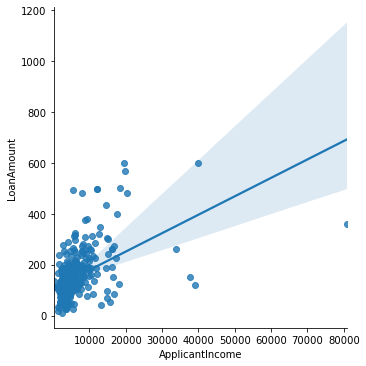

In [12]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=df, palette='Magma')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#step 1 split into train and test data set
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.3)

In [15]:
x_train

,ApplicantIncome,CoapplicantIncome
293,3069,0.0
127,9323,0.0
50,4166,0.0
235,4666,0.0
273,5500,0.0
...,...,...
438,19484,0.0
81,4843,3806.0
11,1853,2840.0
190,6050,4333.0


In [16]:
#step 2 train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
model.fit( x_train, y_train )

LinearRegression()

In [18]:
model.score(x_train, y_train)

0.33219701111580935

In [19]:
predicted_values=pd.DataFrame(model.predict(x_test))
predicted_values

,0
0,112.804438
1,193.193890
2,125.850513
3,129.797218
4,119.756892
...,...
147,133.320993
148,143.456580
149,107.978617
150,159.678973


In [20]:
y_test.reset_index(inplace=True, drop= True) #random index was there in y_test, so now it wil be in sequence and drop the index as a column
y_test

,LoanAmount
0,120
1,96
2,132
3,100
4,40
...,...
147,218
148,187
149,9
150,180


In [21]:

pd.concat( [predicted_values, y_test] , ignore_index=True, axis=1 )

,0,1
0,112.804438,120
1,193.193890,96
2,125.850513,132
3,129.797218,100
4,119.756892,40
...,...,...
147,133.320993,218
148,143.456580,187
149,107.978617,9
150,159.678973,180


In [22]:
ans=pd.concat( [predicted_values, y_test] , ignore_index=True, axis=1)
ans.rename(columns={0:'Predicted', 1:'Actual'}, inplace=True)

In [23]:
ans

,Predicted,Actual
0,112.804438,120
1,193.193890,96
2,125.850513,132
3,129.797218,100
4,119.756892,40
...,...,...
147,133.320993,218
148,143.456580,187
149,107.978617,9
150,159.678973,180


In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted_values, y_test)

5268.032475303952

In [25]:
model.coef_

array([[0.00681613, 0.0105516 ]])

In [26]:
model.intercept_ 

array([91.76985714])

In [27]:
from sklearn.metrics import r2_score
r2_score(predicted_values, y_test)

-2.7919694396224544

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

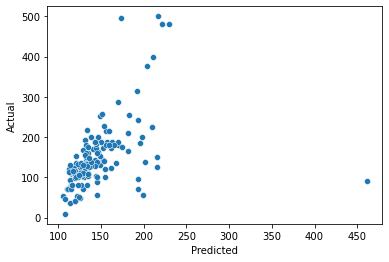

In [28]:
sns.scatterplot( x='Predicted', y='Actual', data= ans)

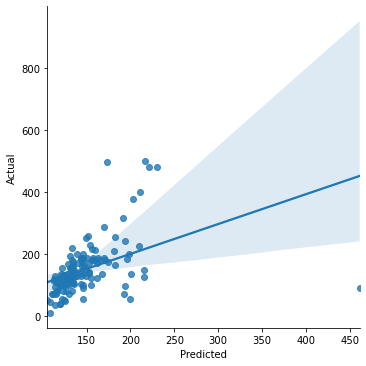

In [29]:
sns.lmplot( x='Predicted', y='Actual', data= ans)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

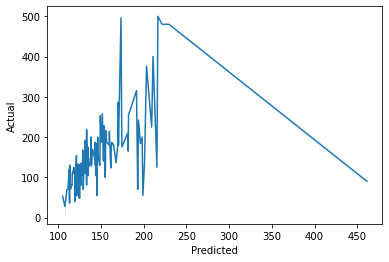

In [30]:
sns.lineplot( x= 'Predicted', y= 'Actual', data= ans)

In [31]:
ans.corr()

,Predicted,Actual
Predicted,1.000000,0.443497
Actual,0.443497,1.000000
